In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
This class is made only for a special type od neutral network
which has only tow hidden layers
Size of input, Output and hidden layers can be changed
'''

'\nThis class is made only for a special type od neutral network\nwhich has only tow hidden layers\nSize of input, Output and hidden layers can be changed\n'

In [3]:
input_size = 2
hidden_layer = [4,4]
output_size = 2

In [4]:
def softmax(a):
    exa = np.exp(a)
    return exa/np.sum(exa,axis=1,keepdims=True)
def loss(y_oht,p):
    l=-np.sum(y_oht*np.log(p))
    return l
def one_hot(y,depth):
    m=y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [5]:
class NeuralNetwork:
    def __init__(self,input_size,hidden_layer_size,output_size):
        np.random.seed(0)
        model={}
        
        model["W1"] = np.random.randn(input_size,hidden_layer_size[0])
        model["b1"] = np.random.randn(1,hidden_layer_size[0])
        
        model["W2"] = np.random.randn(hidden_layer_size[0],hidden_layer_size[1])
        model["b2"] = np.random.randn(1,hidden_layer_size[1])
        
        model["W3"] = np.random.randn(hidden_layer_size[1],output_size)
        model["b3"] = np.random.randn(1,output_size)
        
        self.model = model
        self.activation_output=None
    
    def forward(self,x):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1 = np.dot(x,W1)+b1
        act1 = np.tanh(z1)
        
        z2 = np.dot(act1,W2)+b2
        act2 = np.tanh(z2)
        
        z3 = np.dot(act2,W3)+b3
        y_ = softmax(z3)
        self.activation_output = (act1,act2,y_)
        return y_
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        act1,act2,y_ = self.activation_output
        m=x.shape[0]
        
        delta3=y_-y
        dw3 = np.dot(act2.T,delta3)
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(act2))*np.dot(delta3,W3.T)
        dw2 = np.dot(act1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(act1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        ## Updating 
        self.model["W1"]-=learning_rate*dw1
        self.model["b1"]-=learning_rate*db1
        
        self.model["W2"]-=learning_rate*dw2
        self.model["b2"]-=learning_rate*db2
        
        self.model["W3"]-=learning_rate*dw3
        self.model["b3"]-=learning_rate*db3
    
    
    def Predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    
    def summary(self):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        act1,act2,y_ = self.activation_output
        
        print("W1  ",W1)
        print("b1  ",b1)
        print("W2  ",W2)
        print("b2  ",b2)
        print("W3  ",W3)
        print("b3  ",b3)
        print("act1  ",act1)
        print("act1  ",act2)
        print("y_  ",y_)
        
        
        
        
    
        
        

In [6]:
from sklearn.datasets import make_circles

In [7]:
X,Y = make_circles(n_samples=500,random_state=1,noise=.05,shuffle=True,factor=0.8)

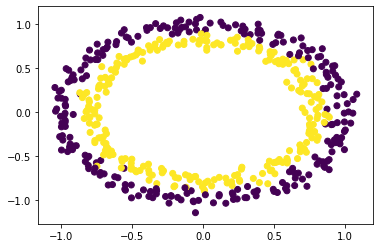

In [8]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [9]:
y_oht = one_hot(Y,2)

In [10]:
nn= NeuralNetwork(2,[4,3],2)

In [11]:
def Train(X,Y,epochs,learning_rate,logs=True):
    training_loss = []
    classes=2
    Y_oht = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        y_ = nn.forward(X)
        l = loss(Y_oht,y_)
        training_loss.append(l)
        nn.backward(X,Y_oht,learning_rate)
        
        if(logs):
            print("Epoch {} Loss {}".format(ix,l))
    
    return training_loss


In [12]:
loss = Train(X,Y,1000,0.0001)

Epoch 0 Loss 999.0746341886511
Epoch 1 Loss 985.7077924728515
Epoch 2 Loss 972.543914077323
Epoch 3 Loss 959.5775996166578
Epoch 4 Loss 946.8038617004122
Epoch 5 Loss 934.218094764127
Epoch 6 Loss 921.8160469656178
Epoch 7 Loss 909.5937940863902
Epoch 8 Loss 897.5477153542631
Epoch 9 Loss 885.6744710880091
Epoch 10 Loss 873.9709820558309
Epoch 11 Loss 862.4344104351045
Epoch 12 Loss 851.0621422597269
Epoch 13 Loss 839.8517712426374
Epoch 14 Loss 828.8010838638813
Epoch 15 Loss 817.9080456184356
Epoch 16 Loss 807.1707883224869
Epoch 17 Loss 796.5875983816915
Epoch 18 Loss 786.1569059299403
Epoch 19 Loss 775.8772747521678
Epoch 20 Loss 765.7473929097155
Epoch 21 Loss 755.7660639916248
Epoch 22 Loss 745.9321989199799
Epoch 23 Loss 736.2448082420476
Epoch 24 Loss 726.7029948464783
Epoch 25 Loss 717.3059470452538
Epoch 26 Loss 708.0529319674197
Epoch 27 Loss 698.943289214959
Epoch 28 Loss 689.9764247354365
Epoch 29 Loss 681.1518048703398
Epoch 30 Loss 672.4689505423397
Epoch 31 Loss 663.927

Epoch 275 Loss 348.2999048437646
Epoch 276 Loss 348.29140255527443
Epoch 277 Loss 348.28295795135847
Epoch 278 Loss 348.27456991188626
Epoch 279 Loss 348.2662373532993
Epoch 280 Loss 348.2579592271746
Epoch 281 Loss 348.2497345188491
Epoch 282 Loss 348.2415622461024
Epoch 283 Loss 348.2334414578943
Epoch 284 Loss 348.2253712331558
Epoch 285 Loss 348.2173506796312
Epoch 286 Loss 348.20937893276744
Epoch 287 Loss 348.2014551546511
Epoch 288 Loss 348.19357853298897
Epoch 289 Loss 348.18574828013095
Epoch 290 Loss 348.177963632134
Epoch 291 Loss 348.1702238478641
Epoch 292 Loss 348.16252820813645
Epoch 293 Loss 348.15487601488934
Epoch 294 Loss 348.14726659039377
Epoch 295 Loss 348.13969927649435
Epoch 296 Loss 348.13217343388203
Epoch 297 Loss 348.12468844139545
Epoch 298 Loss 348.1172436953524
Epoch 299 Loss 348.10983860890644
Epoch 300 Loss 348.10247261143155
Epoch 301 Loss 348.0951451479303
Epoch 302 Loss 348.08785567846655
Epoch 303 Loss 348.08060367762084
Epoch 304 Loss 348.073388633

Epoch 526 Loss 346.97736543657913
Epoch 527 Loss 346.9737802709408
Epoch 528 Loss 346.97020236384935
Epoch 529 Loss 346.9666316728071
Epoch 530 Loss 346.9630681555484
Epoch 531 Loss 346.9595117700369
Epoch 532 Loss 346.9559624744645
Epoch 533 Loss 346.9524202272489
Epoch 534 Loss 346.9488849870318
Epoch 535 Loss 346.9453567126772
Epoch 536 Loss 346.94183536326955
Epoch 537 Loss 346.93832089811167
Epoch 538 Loss 346.9348132767233
Epoch 539 Loss 346.93131245883916
Epoch 540 Loss 346.9278184044071
Epoch 541 Loss 346.9243310735865
Epoch 542 Loss 346.92085042674626
Epoch 543 Loss 346.91737642446355
Epoch 544 Loss 346.9139090275218
Epoch 545 Loss 346.910448196909
Epoch 546 Loss 346.90699389381587
Epoch 547 Loss 346.9035460796348
Epoch 548 Loss 346.9001047159576
Epoch 549 Loss 346.8966697645742
Epoch 550 Loss 346.89324118747095
Epoch 551 Loss 346.8898189468288
Epoch 552 Loss 346.8864030050223
Epoch 553 Loss 346.8829933246176
Epoch 554 Loss 346.87958986837066
Epoch 555 Loss 346.87619259922633


Epoch 795 Loss 346.17215871273925
Epoch 796 Loss 346.1694608012406
Epoch 797 Loss 346.1667632345743
Epoch 798 Loss 346.1640659947156
Epoch 799 Loss 346.1613690636498
Epoch 800 Loss 346.15867242337174
Epoch 801 Loss 346.15597605588596
Epoch 802 Loss 346.15327994320535
Epoch 803 Loss 346.15058406735193
Epoch 804 Loss 346.1478884103555
Epoch 805 Loss 346.1451929542537
Epoch 806 Loss 346.1424976810915
Epoch 807 Loss 346.1398025729209
Epoch 808 Loss 346.1371076118006
Epoch 809 Loss 346.13441277979535
Epoch 810 Loss 346.1317180589758
Epoch 811 Loss 346.1290234314179
Epoch 812 Loss 346.1263288792029
Epoch 813 Loss 346.1236343844165
Epoch 814 Loss 346.12093992914885
Epoch 815 Loss 346.11824549549374
Epoch 816 Loss 346.1155510655489
Epoch 817 Loss 346.11285662141483
Epoch 818 Loss 346.11016214519486
Epoch 819 Loss 346.10746761899486
Epoch 820 Loss 346.10477302492245
Epoch 821 Loss 346.10207834508697
Epoch 822 Loss 346.0993835615991
Epoch 823 Loss 346.0966886565701
Epoch 824 Loss 346.09399361211

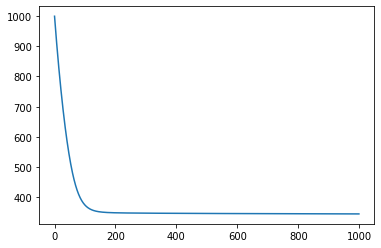

In [13]:
plt.plot(loss)